In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch

from generation.dataset.amplitudes_dataset import AmplitudesDataset
from generation.training.utils import set_seed

set_seed()

Set seed 42


In [2]:
# !pip install -e ../..

In [3]:
config = {
    "lr": 1e-5,
    "epochs_num": 500,
    "batch_size": 256,
    "log_each": 1,
    "save_each": 2,
    "device": "cuda:2",
    "x_dim": 9,
    "z_dim": 1,
    "disc_coef": 5,
    "lambda": 5
}

### Dataset

In [4]:
dataset = AmplitudesDataset()

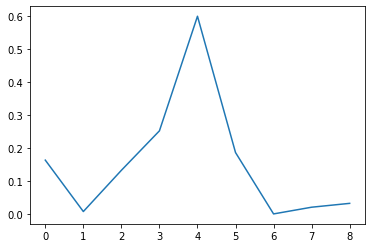

In [5]:
idx = np.random.choice(range(len(dataset)))
plt.plot(dataset[idx])
plt.show()

### Models

In [6]:
from generation.nets.amplitudes import Generator, Discriminator

In [7]:
discriminator = Discriminator(config)
test_tensor = dataset[0].unsqueeze(0)
discriminator(test_tensor, debug=True)
generator = Generator(config)
test_z = torch.rand(1, config['z_dim'])
output = generator(test_z, debug=True)
assert(output.shape == test_tensor.shape)

### Training

In [8]:
from generation.training.wgan_trainer import WganTrainer

g_optimizer = torch.optim.Adam(generator.parameters(), lr=config['lr'])
d_optimizer = torch.optim.Adam(discriminator.parameters(), lr=config['lr'])

trainer = WganTrainer(generator, discriminator, g_optimizer, \
                      d_optimizer, config)

In [ ]:
trainer.run_train(dataset)

wandb: Currently logged in as: whitera2bit (use `wandb login --relogin` to force relogin)
wandb: Tracking run with wandb version 0.10.2
wandb: Run data is saved locally in wandb/run-20200927_173904-36mhkghb
wandb: Syncing run wobbly-snowball-236


# Old

In [5]:
import torch
from torch import nn
from torch.autograd import Variable
from torch.utils.data import Dataset, DataLoader

from generation.dataset.dataset_pytorch import SignalsDataset
from generation.train.wgan import run_train, generate_new_signal

In [6]:
SAMPLE_SIZE = 9

# Train params
NUM_EPOCHS = 25000
BATCH_SIZE = 32
LEARNING_RATE = 1e-4
LATENT_DIM = 8 
PRINT_EACH = 250
VERBOSE = 1
NO_SAVE = True

In [7]:
origin_data = np.array([get_event_amplitudes(event) for event in range(_EVENTS_NUM)])
min_values = np.min(origin_data, axis=0)
max_values = np.max(origin_data, axis=0)
data = (origin_data  - min_values) / (max_values - min_values)
dataset = SignalsDataset(data)

In [8]:
generator = run_train(dataset, \
          latent_dim=LATENT_DIM, \
          sample_size=SAMPLE_SIZE, \
          learning_rate=LEARNING_RATE, \
          num_epochs=NUM_EPOCHS, \
          batch_size=BATCH_SIZE, \
          print_each=PRINT_EACH, \
          verbose=VERBOSE, \
          no_save=NO_SAVE)

epoch-0; D_loss: 0.0008116737008094788; G_loss: -0.01108698919415474
epoch-250; D_loss: -0.00550816860049963; G_loss: -0.0030153323896229267
epoch-500; D_loss: -0.0034405889455229044; G_loss: -0.0032907540444284678
epoch-750; D_loss: 0.0003040460869669914; G_loss: -0.007263634819537401
epoch-1000; D_loss: -0.00028477050364017487; G_loss: -0.008810097351670265
epoch-1250; D_loss: -0.00011084228754043579; G_loss: -0.00874717440456152
epoch-1500; D_loss: -0.0002944180741906166; G_loss: -0.008828296326100826
epoch-1750; D_loss: -0.00012085121124982834; G_loss: -0.008716307580471039
epoch-2000; D_loss: -0.00019751302897930145; G_loss: -0.00901762768626213
epoch-2250; D_loss: -0.0002865185961127281; G_loss: -0.00883521605283022
epoch-2500; D_loss: -0.00018443260341882706; G_loss: -0.009229926392436028
epoch-2750; D_loss: -0.00021073129028081894; G_loss: -0.009273109957575798
epoch-3000; D_loss: -0.00027786940336227417; G_loss: -0.009061268530786037
epoch-3250; D_loss: -0.00033590756356716156

In [9]:
generated_signals = np.array([generate_new_signal(generator)[0] for i in range(len(origin_data))])

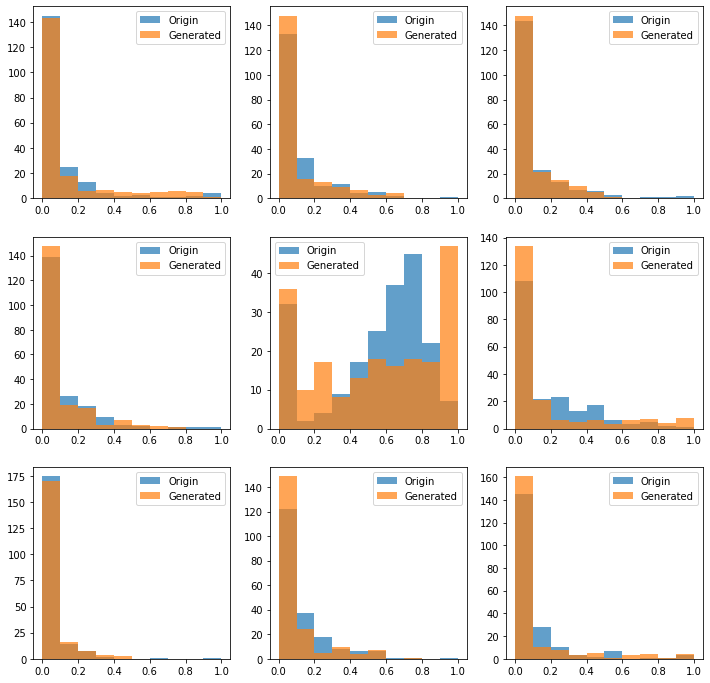

In [10]:
f, ax = plt.subplots(3, 3, figsize=(12, 12))
_bins = np.arange(0, 1.1, 0.1)
for detector in range(9):
    gen = generated_signals[:, detector]
    ori = data[:, detector]
    ax[detector//3][detector % 3].hist(ori, alpha=0.7, bins=_bins)
    ax[detector//3][detector % 3].hist(gen, alpha=0.7, bins=_bins)
    ax[detector//3][detector % 3].legend(['Origin', 'Generated'])

100%|██████████| 9/9 [00:00<00:00, 14.94it/s]


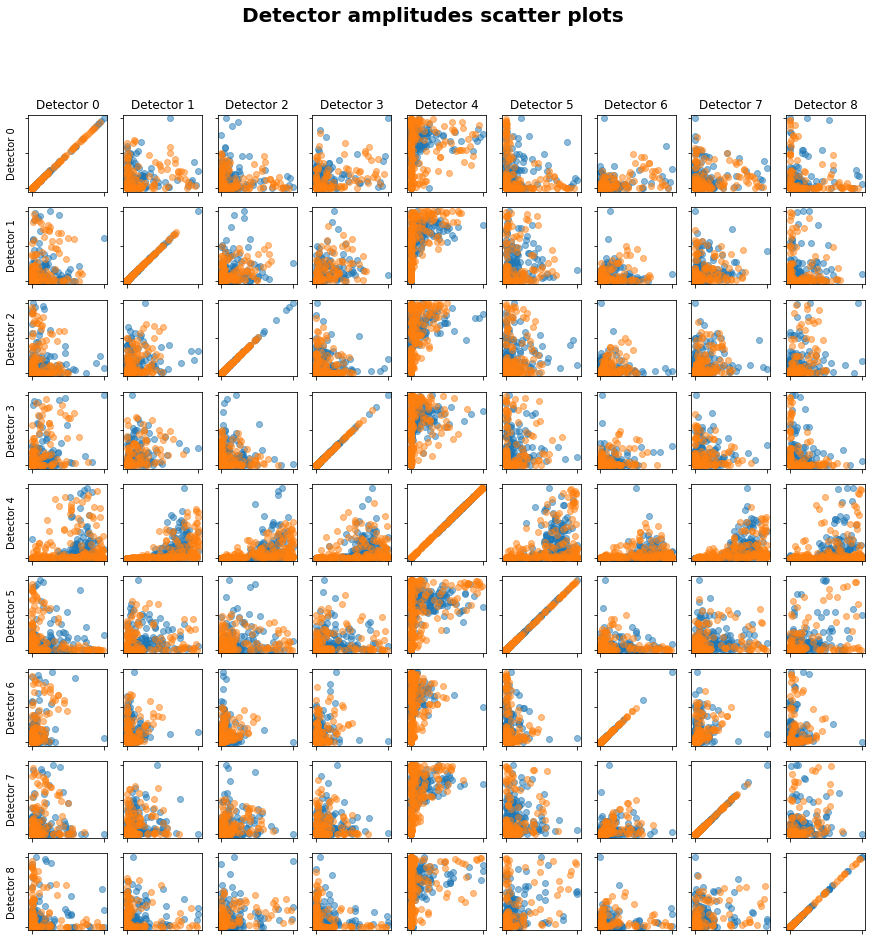

In [11]:
f, ax = prepare_figure_axis()
for detector1 in tqdm.tqdm(range(_DETECTORS_NUM)):
    for detector2 in range(_DETECTORS_NUM):
        ax[detector1][detector2].set_xticklabels([])
        ax[detector1][detector2].set_yticklabels([])
        _plot_scatter(data, ax[detector1][detector2], detector1, detector2, alpha=0.5)
        _plot_scatter(generated_signals, ax[detector1][detector2], detector1, detector2, alpha=0.5)
plt.show()